## Table Of Content
### Steps are:
1. Gathering Data
2. Exploratory Data Analysis
3. Data Visualizations
4. Model Implementation.
5. ML Model Selecting and Model PredPrediction
6. HyperTunning the ML Model
7. Deploy Model

# Install and import requaired libraries

In [8]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # for linear algebra

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
sns.set_style('darkgrid')

# Data Filtering
from sklearn.preprocessing import LabelEncoder

# Train Test Splitting
# Preprocessing and model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Check the Model Accuracy, Errors and it's Validations
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.svm import SVC
from sklearn import metrics

# HyperTunning Parameters
from sklearn.model_selection import GridSearchCV

# Load DataSet

In [9]:
data = pd.read_csv(r"C:\Users\innoc\Desktop\Gitwork\Breast-Cancer-Prediction\data.csv")

After collecting data, we need to know what are the shape of this dataset, Here we have attribute`(property)` called `data.shape`

For that we have 2 type of methods to show the shape of the datasets.

1. `len(data.index), len(data.columns)`
- data.shape

In [10]:
data.shape

(569, 33)

Display the Head & Tail of the dataset

In [11]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


After the data collection and checking the dataset proced to the next step

# Exploring Data Analysis (EDA)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
data.isna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [15]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [16]:
data.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [17]:
data = data.dropna(axis='columns')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- **Get object features**
     - Using this method, we can see how many `object(categorical)` type of feature exists in dataset

In [18]:
data.describe(include="O")

,diagnosis
count,569
unique,2
top,B
freq,357


As we can see abouve result there are only one single feature is categorical and it's values are ***B*** and ***M***

### To know how many unique values

In [19]:
data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

using `value_counts` method we can see number of unique values in categorical type of feature.

### Identify dependent and independent

In [20]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [21]:
diagnosis_unique = data.diagnosis.unique()
diagnosis_unique

array(['M', 'B'], dtype=object)

# Data Visualization

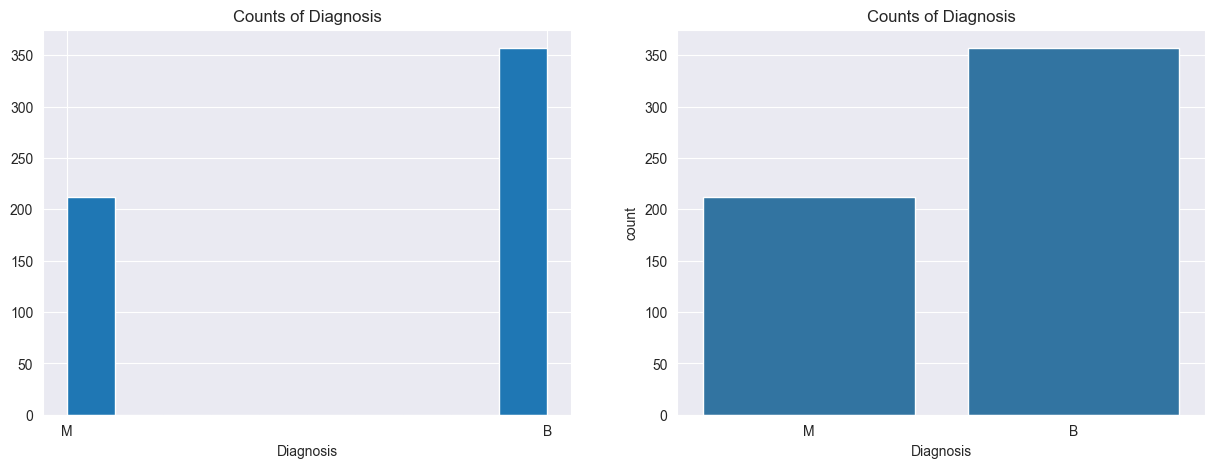

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(data.diagnosis)
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")

plt.subplot(1, 2, 2)
sns.countplot( x='diagnosis', data=data)
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")

plt.show()


In [23]:
plt.figure(figsize=(7,12))
px.histogram(data, x = 'diagnosis')
plt.show()

<Figure size 700x1200 with 0 Axes>

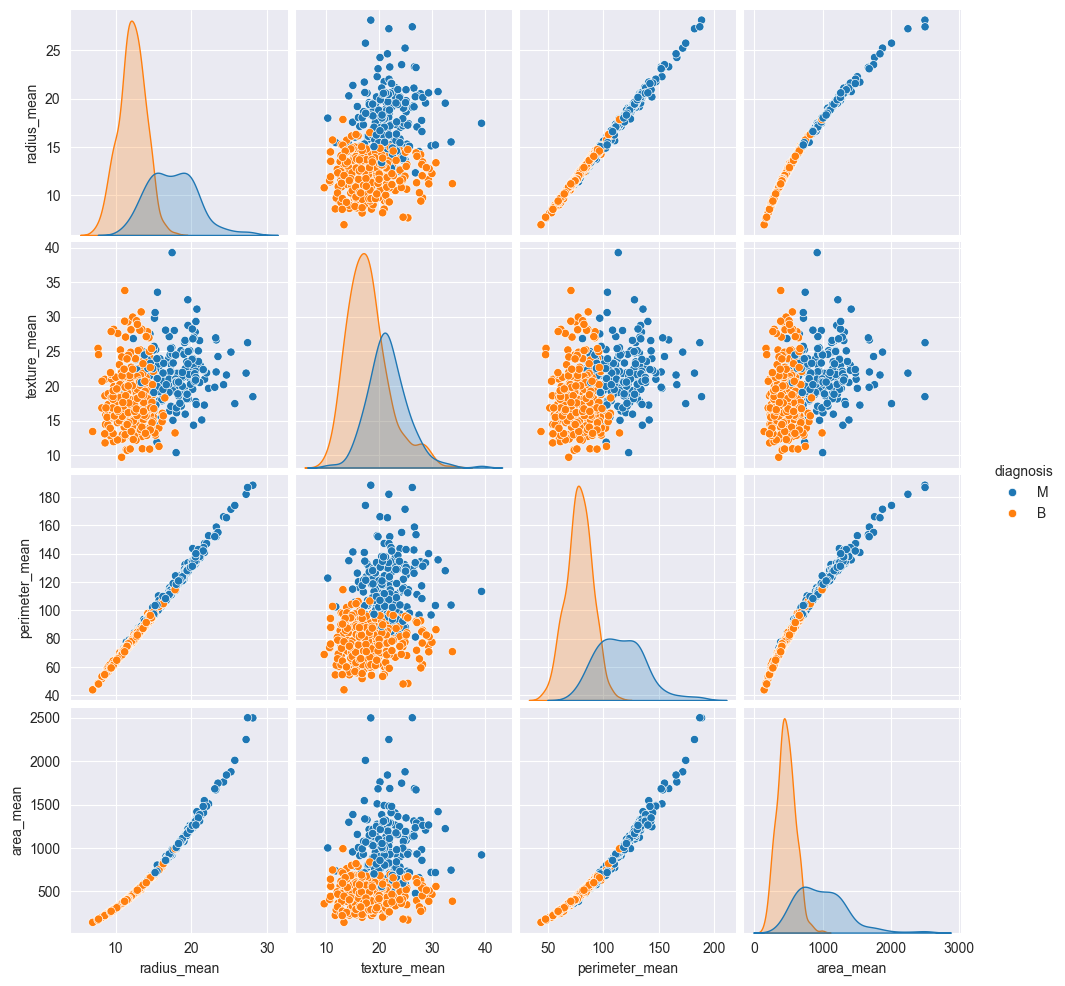

In [24]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]
sns.pairplot(data[cols], hue="diagnosis")
plt.show()

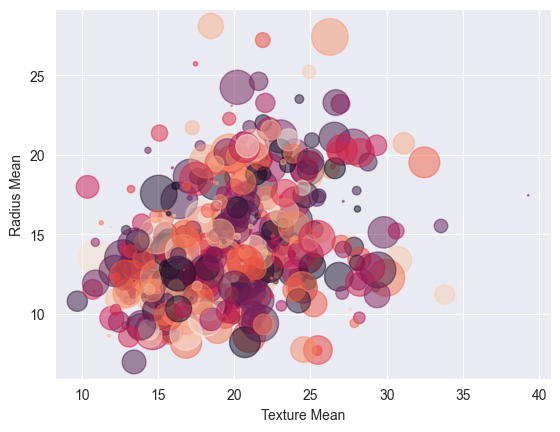

In [25]:
size = len(data['texture_mean'])
area = np.pi*(15 * np.random.rand(size))**2
colors = np.random.rand(size)
plt.xlabel('Texture Mean')
plt.ylabel('Radius Mean')

plt.scatter(data['texture_mean'], data['radius_mean'], s = area, c=colors, alpha=0.5);


### Data Filtering
- Now, we have one categorical feature, so we need to convert it into numeric values using `LabelEncoder` from `sklearn.preprocessing` packages for using our dataset into model.

In [26]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


- `LabelEncoder` can be used to normalize labels.

In [27]:
labelencoder_Y = LabelEncoder()
data.diagnosis = labelencoder_Y.fit_transform(data.diagnosis)


- After converting into numerical values, we can check it's values using this way,

In [28]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [29]:
print(data.diagnosis.value_counts())
print("\n", data.diagnosis.value_counts().sum())

diagnosis
0    357
1    212
Name: count, dtype: int64

 569


- Finnaly, We can see in this output categorical values converted into `0` and `1`.

### Find the `correlation` between other features, mean features only

In [30]:
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
print(len(cols))
data[cols].corr()

11


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<Axes: title={'center': 'Correlation Graph'}>

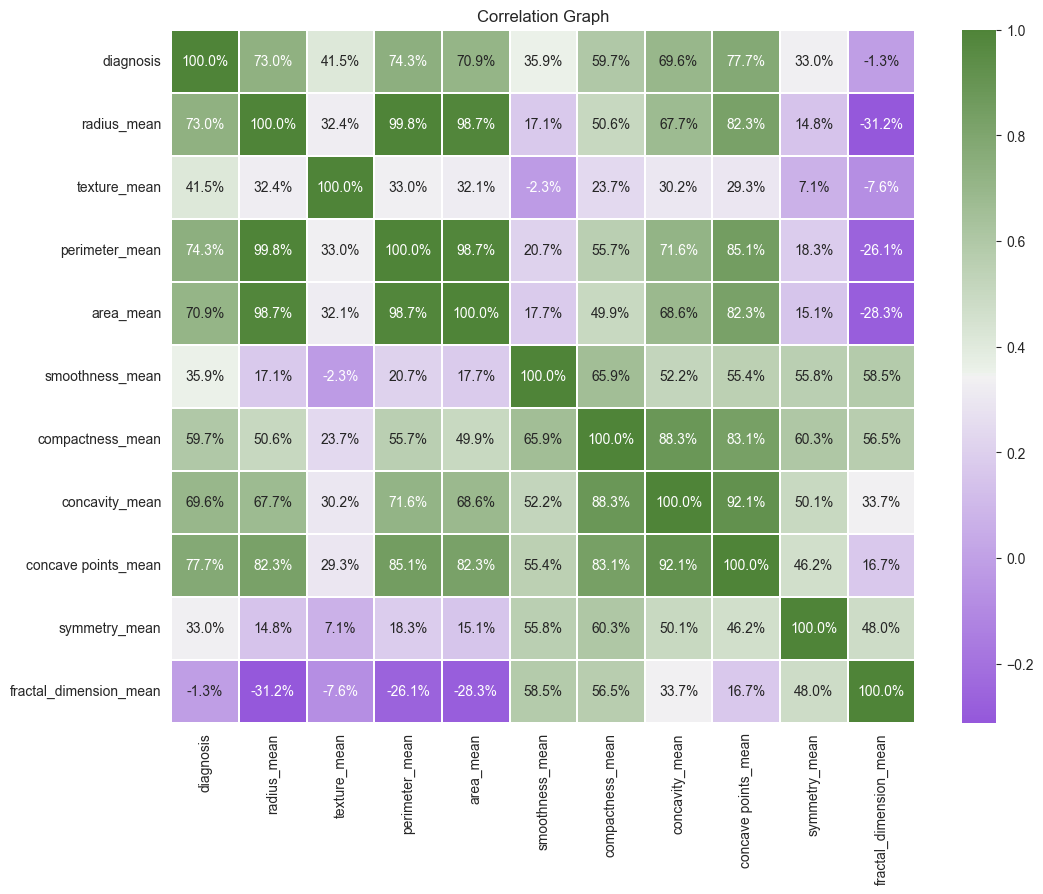

In [31]:
plt.figure(figsize = (12,9))
plt.title('Correlation Graph')
cmap = sns.diverging_palette(1000, 120, as_cmap = True)
sns.heatmap(data[cols].corr(), annot=True, fmt='.1%', linewidths=.05, cmap = cmap)

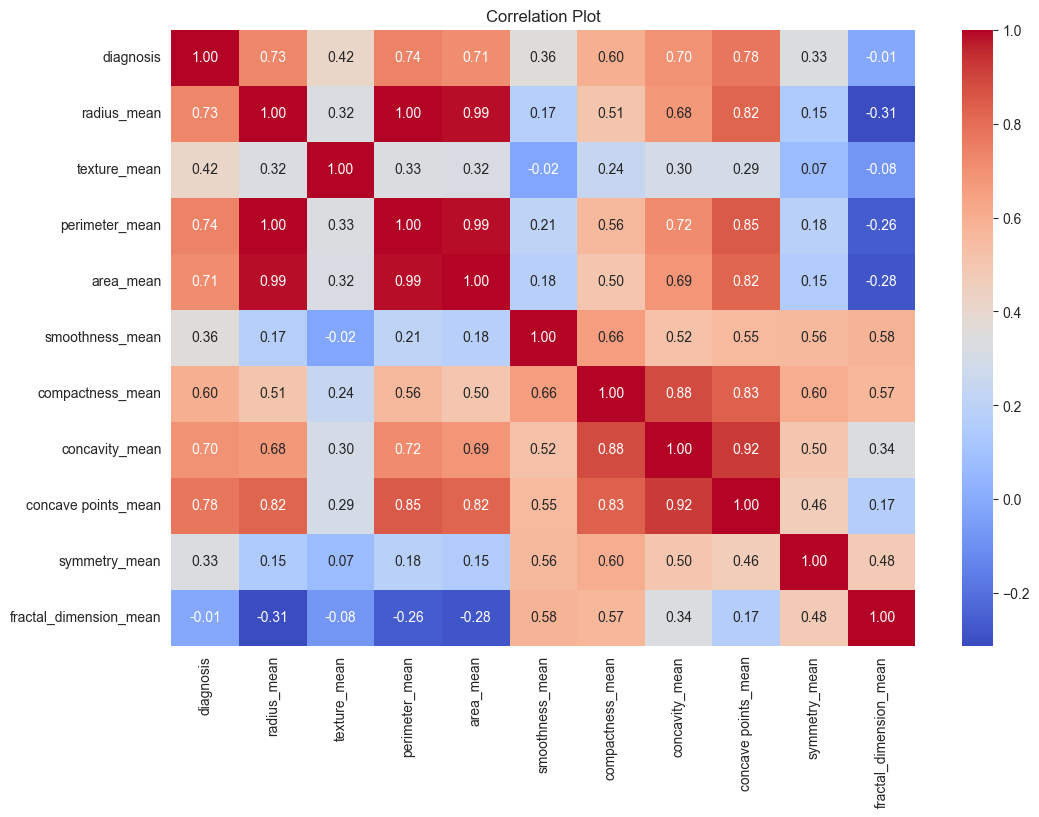

In [32]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data[cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Plot')
plt.show()


- Using, `Plotly` Package we can show it in interactive graphs like this:

In [33]:
plt.figure(figsize=(15,10))

fix = px.imshow(data[cols].corr());
plt.show()

<Figure size 1500x1000 with 0 Axes>

# Model Implementation
### Feature Selection
- Select feature for predictions

In [34]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

- Selecet the `dependent` and `independent` feature for prediction

In [35]:
prediction_feature = [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']
targeted_feature = 'diagnosis'
len(prediction_feature)

6

In [36]:
X = data[prediction_feature]
X

,radius_mean,perimeter_mean,area_mean,symmetry_mean,compactness_mean,concave points_mean
0,17.99,122.80,1001.0,0.2419,0.27760,0.14710
1,20.57,132.90,1326.0,0.1812,0.07864,0.07017
2,19.69,130.00,1203.0,0.2069,0.15990,0.12790
3,11.42,77.58,386.1,0.2597,0.28390,0.10520
4,20.29,135.10,1297.0,0.1809,0.13280,0.10430
...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.1726,0.11590,0.13890
565,20.13,131.20,1261.0,0.1752,0.10340,0.09791
566,16.60,108.30,858.1,0.1590,0.10230,0.05302
567,20.60,140.10,1265.0,0.2397,0.27700,0.15200


In [37]:
X.shape

(569, 6)

In [38]:
X.values

array([[1.799e+01, 1.228e+02, 1.001e+03, 2.419e-01, 2.776e-01, 1.471e-01],
       [2.057e+01, 1.329e+02, 1.326e+03, 1.812e-01, 7.864e-02, 7.017e-02],
       [1.969e+01, 1.300e+02, 1.203e+03, 2.069e-01, 1.599e-01, 1.279e-01],
       ...,
       [1.660e+01, 1.083e+02, 8.581e+02, 1.590e-01, 1.023e-01, 5.302e-02],
       [2.060e+01, 1.401e+02, 1.265e+03, 2.397e-01, 2.770e-01, 1.520e-01],
       [7.760e+00, 4.792e+01, 1.810e+02, 1.587e-01, 4.362e-02, 0.000e+00]])

In [39]:
y = data.diagnosis
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [40]:
y.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

- Splite the dataset into `TrainingSet` and `TestingSet` by 33% and set the 15 fixed records

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=15)
X_train

,radius_mean,perimeter_mean,area_mean,symmetry_mean,compactness_mean,concave points_mean
274,17.93,115.20,998.9,0.1538,0.07027,0.04744
189,12.30,78.83,463.7,0.1667,0.07253,0.01654
158,12.06,76.84,448.6,0.1590,0.05241,0.01963
257,15.32,103.20,713.3,0.2398,0.22840,0.12420
486,14.64,94.21,666.0,0.1409,0.06698,0.02791
...,...,...,...,...,...,...
85,18.46,121.10,1075.0,0.2132,0.10530,0.08795
199,14.45,94.49,642.7,0.1950,0.12060,0.05980
156,17.68,117.40,963.7,0.1971,0.16650,0.10540
384,13.28,85.79,541.8,0.1617,0.08575,0.02864


In [42]:
X_test

,radius_mean,perimeter_mean,area_mean,symmetry_mean,compactness_mean,concave points_mean
350,11.660,73.70,421.0,0.1671,0.03630,0.01162
222,10.180,65.12,313.1,0.1910,0.08502,0.01915
141,16.110,105.10,813.0,0.1861,0.11370,0.05943
447,14.800,95.88,674.8,0.1893,0.08890,0.02260
103,9.876,63.95,298.3,0.1945,0.09697,0.03029
...,...,...,...,...,...,...
218,19.800,129.70,1230.0,0.2094,0.13060,0.08691
24,16.650,110.00,904.6,0.1995,0.14570,0.09170
530,11.750,75.89,422.9,0.1598,0.09713,0.04440
204,12.470,81.09,481.9,0.1925,0.10580,0.03821


### Perform Feature Standerd Scalling
Standardize features by removing the mean and scaling to unit variance

- The standard score of a sample x is calculated as:

    - z = (x - u) / s

In [43]:
# Scale the data to keep all the values in the same magnitude of 0 -1 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# ML Model Selecting and Model Prediction
### Model Building
Now, we are ready to build our model for prediction, for the I made function for model building and preforming prediction and measure it's prediction and accuracy score.

### Arguments
    1. model => ML Model Object
    2. Feature Training Set data
    3. Feature Testing Set data
    4. Targetd Training Set data
    5. Targetd Testing Set data

In [44]:
def model_building(model, X_train, X_test, y_train, y_test):
    """
    
    Model Fitting, Prediction And Other stuff
    return ('score', 'accuracy_score', 'predictions' )
    """
    
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)
    
    return (score, accuracy, predictions)  

- Let's make a dictionary for multiple models for bulk predictions

In [45]:
models_list = {
    "LogisticRegression" :  LogisticRegression(),
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
    "SVC" :  SVC(),
}
models_list

{'LogisticRegression': LogisticRegression(),
 'RandomForestClassifier': RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5),
 'DecisionTreeClassifier': DecisionTreeClassifier(criterion='entropy', random_state=0),
 'SVC': SVC()}

- Before, sending it to the prediction check the key and values to store it's values in DataFrame below.

In [46]:
print(list(models_list.keys()))
print(list(models_list.values()))

print(zip(list(models_list.keys()), list(models_list.values())))

['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC']
[LogisticRegression(), RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5), DecisionTreeClassifier(criterion='entropy', random_state=0), SVC()]


### Model Implementing
- Now, Train the model one by one and show the classification report of perticular models wise.

In [47]:
# Let's Define the function for confision metric Graphs

def cm_metrix_graph(cm):
    
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()

In [48]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    print("\n\nClassification Report of '"+ str(name), "'\n")
    
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    
        
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)



Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       115
           1       0.92      0.84      0.88        73

    accuracy                           0.91       188
   macro avg       0.91      0.90      0.90       188
weighted avg       0.91      0.91      0.91       188





Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       115
           1       0.93      0.88      0.90        73

    accuracy                           0.93       188
   macro avg       0.93      0.92      0.92       188
weighted avg       0.93      0.93      0.93       188



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       115
           1       0.92      0.84      0.88        73

    accuracy                           0.91       188
   macro avg       0.91      0.90      0.90       188
weighted avg       0.91      0.91      0.91       188



Classification Report of 'SVC '

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       115
           1       0.94      0.84      0.88        73

    accuracy                           

In [49]:
print(len(confusion_matrixs))

4


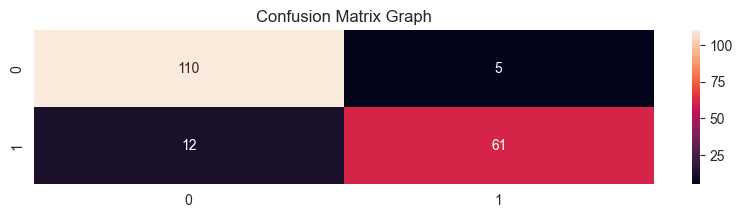

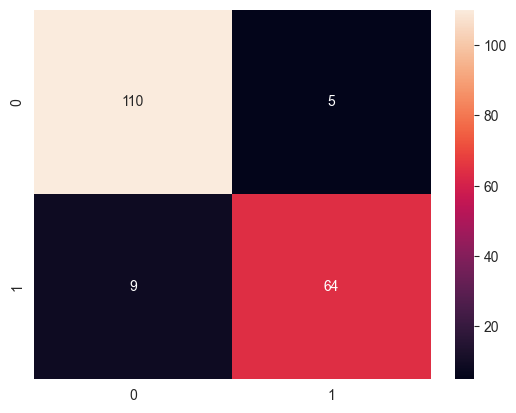

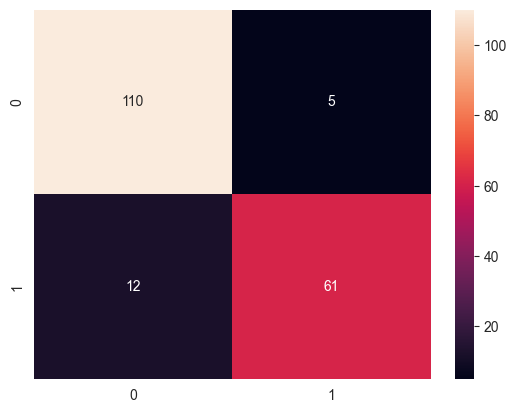

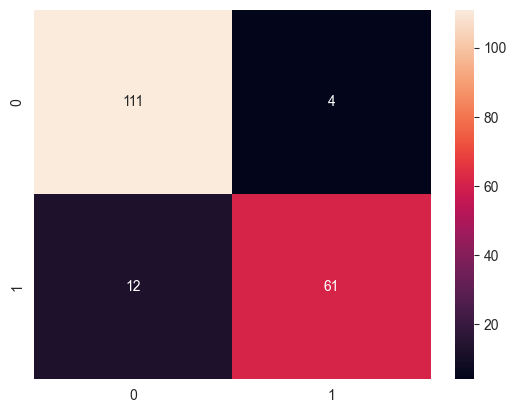

<Figure size 640x480 with 0 Axes>

In [50]:
plt.figure(figsize=(10,2))
plt.title('Confusion Matrix Graph')

for index, cm in enumerate(confusion_matrixs):
    plt.xlabel('Nagtive, Positive')
    plt.ylabel('True, Positive')

    # Show The Metrics Graph
    cm_metrix_graph(cm)
    plt.tight_layout(pad=True)

- While Predicting we can store model's score and prediction values to new generated dataframe

In [51]:
df_pred

,model_name,score,accuracy_score,accuracy_percentage
0,LogisticRegression,0.916010,0.909574,90.96%
1,RandomForestClassifier,0.992126,0.925532,92.55%
2,DecisionTreeClassifier,1.000000,0.909574,90.96%
3,SVC,0.923885,0.914894,91.49%


- print the hightest accuracy score using `sort values` function

In [52]:
df_pred.sort_values('score', ascending=False)

,model_name,score,accuracy_score,accuracy_percentage
2,DecisionTreeClassifier,1.000000,0.909574,90.96%
1,RandomForestClassifier,0.992126,0.925532,92.55%
3,SVC,0.923885,0.914894,91.49%
0,LogisticRegression,0.916010,0.909574,90.96%


In [53]:
df_pred.sort_values('accuracy_score', ascending=False)

,model_name,score,accuracy_score,accuracy_percentage
1,RandomForestClassifier,0.992126,0.925532,92.55%
3,SVC,0.923885,0.914894,91.49%
0,LogisticRegression,0.916010,0.909574,90.96%
2,DecisionTreeClassifier,1.000000,0.909574,90.96%


Applying `K-Fold` Technique

In [54]:
len(data)

569

In [55]:
# Sample For testing only
cv_score = cross_validate(LogisticRegression(), X, y, cv = 3,
                        scoring = ('r2', 'neg_mean_squared_error'),
                        return_train_score = True)
pd.DataFrame(cv_score).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,3.0,0.076155,0.050693,0.019866,0.055129,0.090393,0.104300,0.118206
score_time,3.0,0.014569,0.018351,0.003973,0.003974,0.003974,0.019867,0.035759
test_r2,3.0,0.534312,0.186125,0.325364,0.460291,0.595218,0.638786,0.682353
train_r2,3.0,0.545196,0.051555,0.514363,0.515437,0.516511,0.560613,0.604714
test_neg_mean_squared_error,3.0,-0.108902,0.043669,-0.157895,-0.126316,-0.094737,-0.084405,-0.074074
train_neg_mean_squared_error,3.0,-0.106321,0.012102,-0.113456,-0.113307,-0.113158,-0.102753,-0.092348


- Let's define a functino for `cross validation` scorring for multiple ML models

In [56]:
def cross_val_scorring(model):
    
#     (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    model.fit(data[prediction_feature], data[targeted_feature])
    
    # score = model.score(X_train, y_train)    
    
    predictions = model.predict(data[prediction_feature])    
    accuracy = accuracy_score(predictions, data[targeted_feature])
    print("\nFull-Data Accuracy:", round(accuracy, 2))
    print("Cross Validation Score of'"+ str(name), "'\n")
    
    
    # Initialize K folds.
    kFold = KFold(n_splits=5) # define 5 diffrent data folds
    
    err = []
    
    for train_index, test_index in kFold.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)

        # Data Spliting via fold indexes
        X_train = data[prediction_feature].iloc[train_index, :] # train_index = rows and all columns for Prediction_features
        y_train = data[targeted_feature].iloc[train_index] # all targeted features trains
        
        X_test = data[prediction_feature].iloc[test_index, :] # testing all rows and cols
        y_test = data[targeted_feature].iloc[test_index] # all targeted tests
        
        # Again Model Fitting
        model.fit(X_train, y_train)

        err.append(model.score(X_train, y_train))
        
        print("Score:", round(np.mean(err),  2) )


- Call the function to know the `cross validation` function by mean for our select model predictions.

In [57]:
for name, model in zip(list(models_list.keys()), list(models_list.values())):
    cross_val_scorring(model)


Full-Data Accuracy: 0.9
Cross Validation Score of'LogisticRegression '

Score: 0.91
Score: 0.91
Score: 0.9
Score: 0.9
Score: 0.9

Full-Data Accuracy: 1.0
Cross Validation Score of'RandomForestClassifier '

Score: 0.99
Score: 0.99
Score: 0.99
Score: 1.0
Score: 1.0

Full-Data Accuracy: 1.0
Cross Validation Score of'DecisionTreeClassifier '

Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0

Full-Data Accuracy: 0.89
Cross Validation Score of'SVC '

Score: 0.9
Score: 0.89
Score: 0.88
Score: 0.88
Score: 0.88


- Some of the model are giving prefect scorring. it means sometimes overfitting occurs

# HyperTunning the ML Model
For HyperTunning we can use `GridSearchCV` to know the best performing parameters

- GridSearchCV implements a `“fit”` and a `“score”` method. It also implements `“predict”`, `“predict_proba”`, `“decision_function”`, `“transform”` and `“inverse_transform”` if they are implemented in the estimator used.

- The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [58]:
# Let's Implement Grid Search Algorithm

# Pick the model
model = DecisionTreeClassifier()

# Tunning Params
param_grid = {
    'max_features': [None, 'sqrt', 'log2'],  # Replaced 'auto' with None
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # For 10 Cross-Validation

gsc.fit(X_train, y_train) # Model Fitting

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estimator is ")
print(gsc.best_estimator_)

print("\n Best Parameters are")
print(gsc.best_params_)



 Best Score is 
0.9185560053981107

 Best Estimator is 
DecisionTreeClassifier(max_features='log2', min_samples_leaf=7,
                       min_samples_split=10)

 Best Parameters are
{'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 10}


### Observation
Using this Algorithm, we can see that
- A little score improved compared to previous model
- Showing the Best Estimator Parametes for final model
- We can see the Best Parametes for KNN Model.

- Finally, Implement same strategy for `SVM`

In [59]:
# Pick the model
model = SVC()


# Tunning Params
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              }
]


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estimator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9184885290148447

 Best Estimator is 
SVC(C=10, gamma=0.001)

 Best Parametes are
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


### Observation
Using this Algorithm, we can see that
- It's gives slight better score
- Showing the Best Estimator Parametes for final model

# Deploy Model
- Finally, we are done so far. The last step is to deploy our model in production map. So we need to export our model and bind with web application API.
- Using pickle we can export our model and store in to `model.pkl` file, so we can ealy access this file and calculate customize prediction using Web App API.

**A little bit information about pickle:**

`Pickle` is the standard way of serializing objects in Python. You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file. Later you can load this file to deserialize your model and use it to make new predictions

- Here is example of the Pickle export model

In [71]:
import pickle  # Add this line to import the pickle module

model.fit(X_train, y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9148936170212766


In [63]:
import pickle as pkl
# Trainned Model # You can also use your own trainned model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

filename = 'logistic_model.pkl'
pkl.dump(logistic_model, open(filename, 'wb')) # wb means write as binary

- Now, You can check your current directory. You can see the file with named "`logistic_model.pkl`"

To read model from file

In [66]:
# load the model from disk
loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
result = loaded_model.score(X_test, y_test)
result

0.9095744680851063

# Conclusion
#### In this kernel, We saw the data cleaning and EDA using pandas methods and showed some visual graphs to know the behavior of this dataset, finally, we trained some models for it and calculated the prediction and its accuracy scores and hypertuning. I have written some basic codes in this notebook. So, After successfully completed we can deploy our models to the live production mode using exporting models and some Python web applications. For that, we can use Flask, Django, or FastAPI frameworks.